In [ ]:
import pandas as pd

# Load the CSV file
csv_file = 'Grid.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Define a function to convert decimal values to time format (HH:MM)
def decimal_to_time(decimal_value):
    hours = int(decimal_value)
    minutes = int((decimal_value - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Apply the conversion function to the first column (X-axis)
df[df.columns[0]] = df[df.columns[0]].apply(decimal_to_time)

# Save the updated data to an Excel file
csv_output_file = 'Grid_updated.csv'  # Replace with your desired CSV file path
df.to_csv(csv_output_file, index=False)

print(f"Data converted and saved to {csv_output_file}")





Data converted and saved to Grid_updated.csv


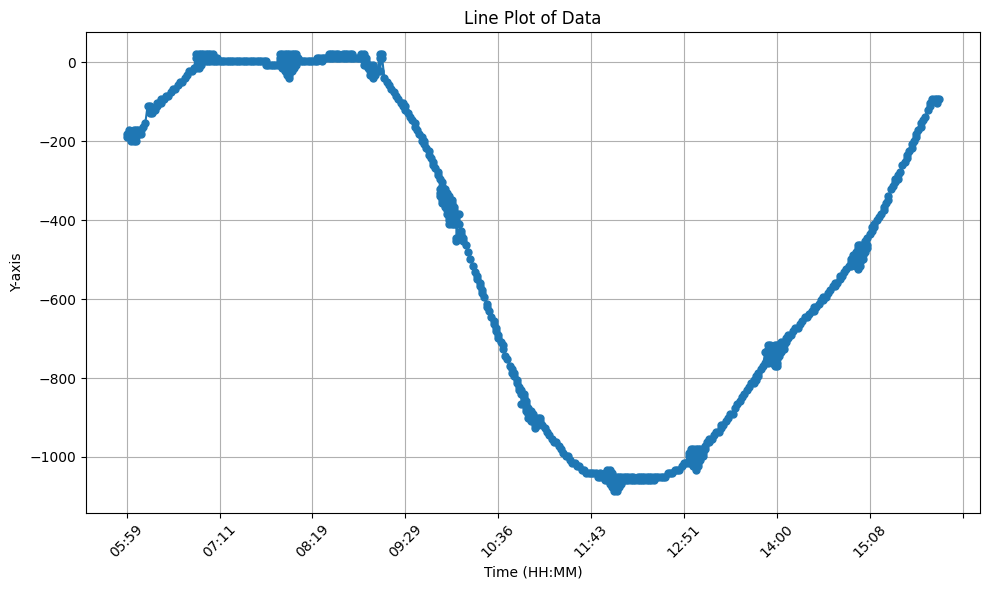

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Load the CSV file
csv_file = 'Grid_updated.csv'  # Replace with the path to your updated CSV file
df = pd.read_csv(csv_file)

# Extract the X and Y data
x_values = df[df.columns[0]]  # Assuming the X-axis is the first column
y_values = df[df.columns[1]]  # Assuming the Y-axis is the second column

# Create a line plot with smaller markers
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
ax.plot(x_values, y_values, marker='o', markersize=5, linestyle='-')  # Adjust markersize as desired
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Y-axis')
ax.set_title('Line Plot of Data')

# Adjust X-axis tick spacing for visibility
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Load your CSV data (assuming you have two columns without names)
df = pd.read_csv('Grid_updated.csv', header=None, names=['0', '1'])

# Convert '0' column (time) to a numeric format (e.g., seconds since midnight)
time_strings = df['0']
time_values = pd.to_datetime(time_strings, format='%H:%M')
x = (time_values - time_values.min()).dt.total_seconds()

# Convert '1' column to numeric (assuming it contains valid numeric data)
y = df['1'].astype(float)

# Define the desired time points for interpolation
new_x = np.linspace(x.min(), x.max(), 17000)

# Perform linear interpolation
f = interp1d(x, y, kind='linear')

# Interpolate the power values at the new time points
new_y = f(new_x)

# Convert the interpolated time values back to 'HH:MM' format (if needed)
new_time_values = pd.to_datetime(time_values.min() + pd.to_timedelta(new_x, unit='s'))
new_time_strings = new_time_values.strftime('%H:%M')

# Create a DataFrame with the interpolated data
interpolated_df = pd.DataFrame({'0': new_time_strings, '1': new_y})

# Save the interpolated data to a new CSV file
interpolated_df.to_csv('Grid_updated_extended.csv', index=False)


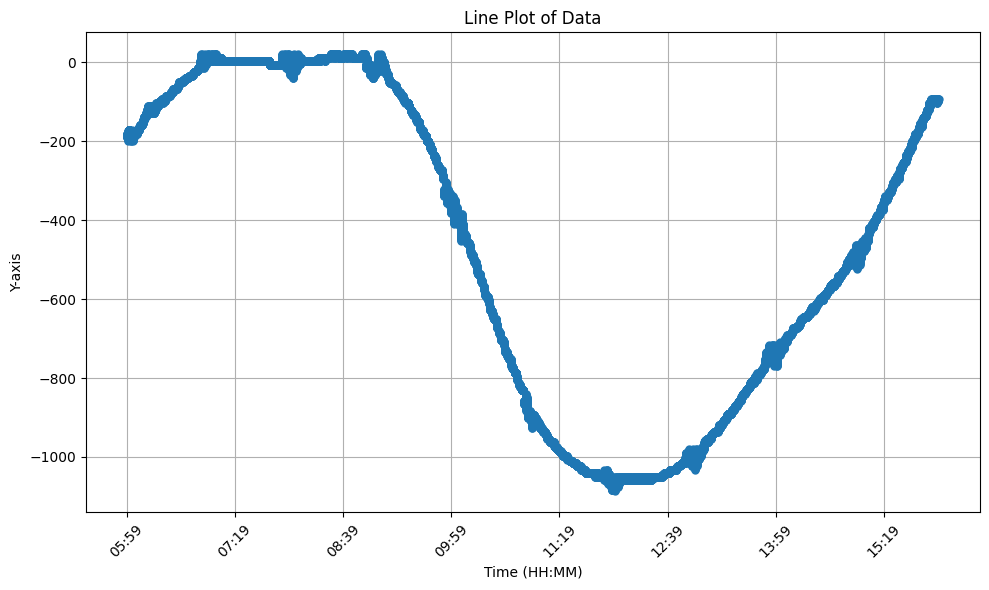

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Load the CSV file
csv_file = 'Grid_updated_extended.csv'  # Replace with the path to your updated CSV file
df = pd.read_csv(csv_file)

# Extract the X and Y data
x_values = df[df.columns[0]]  # Assuming the X-axis is the first column
y_values = df[df.columns[1]]  # Assuming the Y-axis is the second column

# Create a line plot with smaller markers
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
ax.plot(x_values, y_values, marker='o', markersize=5, linestyle='-')  # Adjust markersize as desired
ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('Y-axis')
ax.set_title('Line Plot of Data')

# Adjust X-axis tick spacing for visibility
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()